### ML2.1 Классификация изображений

In [1]:
from sklearn.datasets import fetch_olivetti_faces
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import learning_curve
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import time

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
faces = fetch_olivetti_faces()
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [5]:
faces['data'].shape

(400, 4096)

In [6]:
faces['images'].shape

(400, 64, 64)

In [7]:
faces['target'].shape

(400,)

#### 4.	Выведите несколько изображений на экран используя инструментарий библиотеки matplotlib;

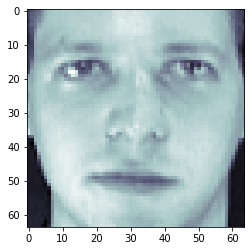

In [9]:
plt.imshow(faces['images'][0], cmap=plt.cm.bone)

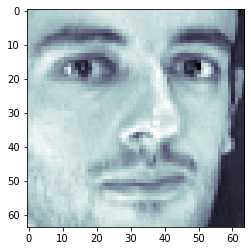

In [12]:
plt.imshow(faces['images'][156], cmap=plt.cm.bone)

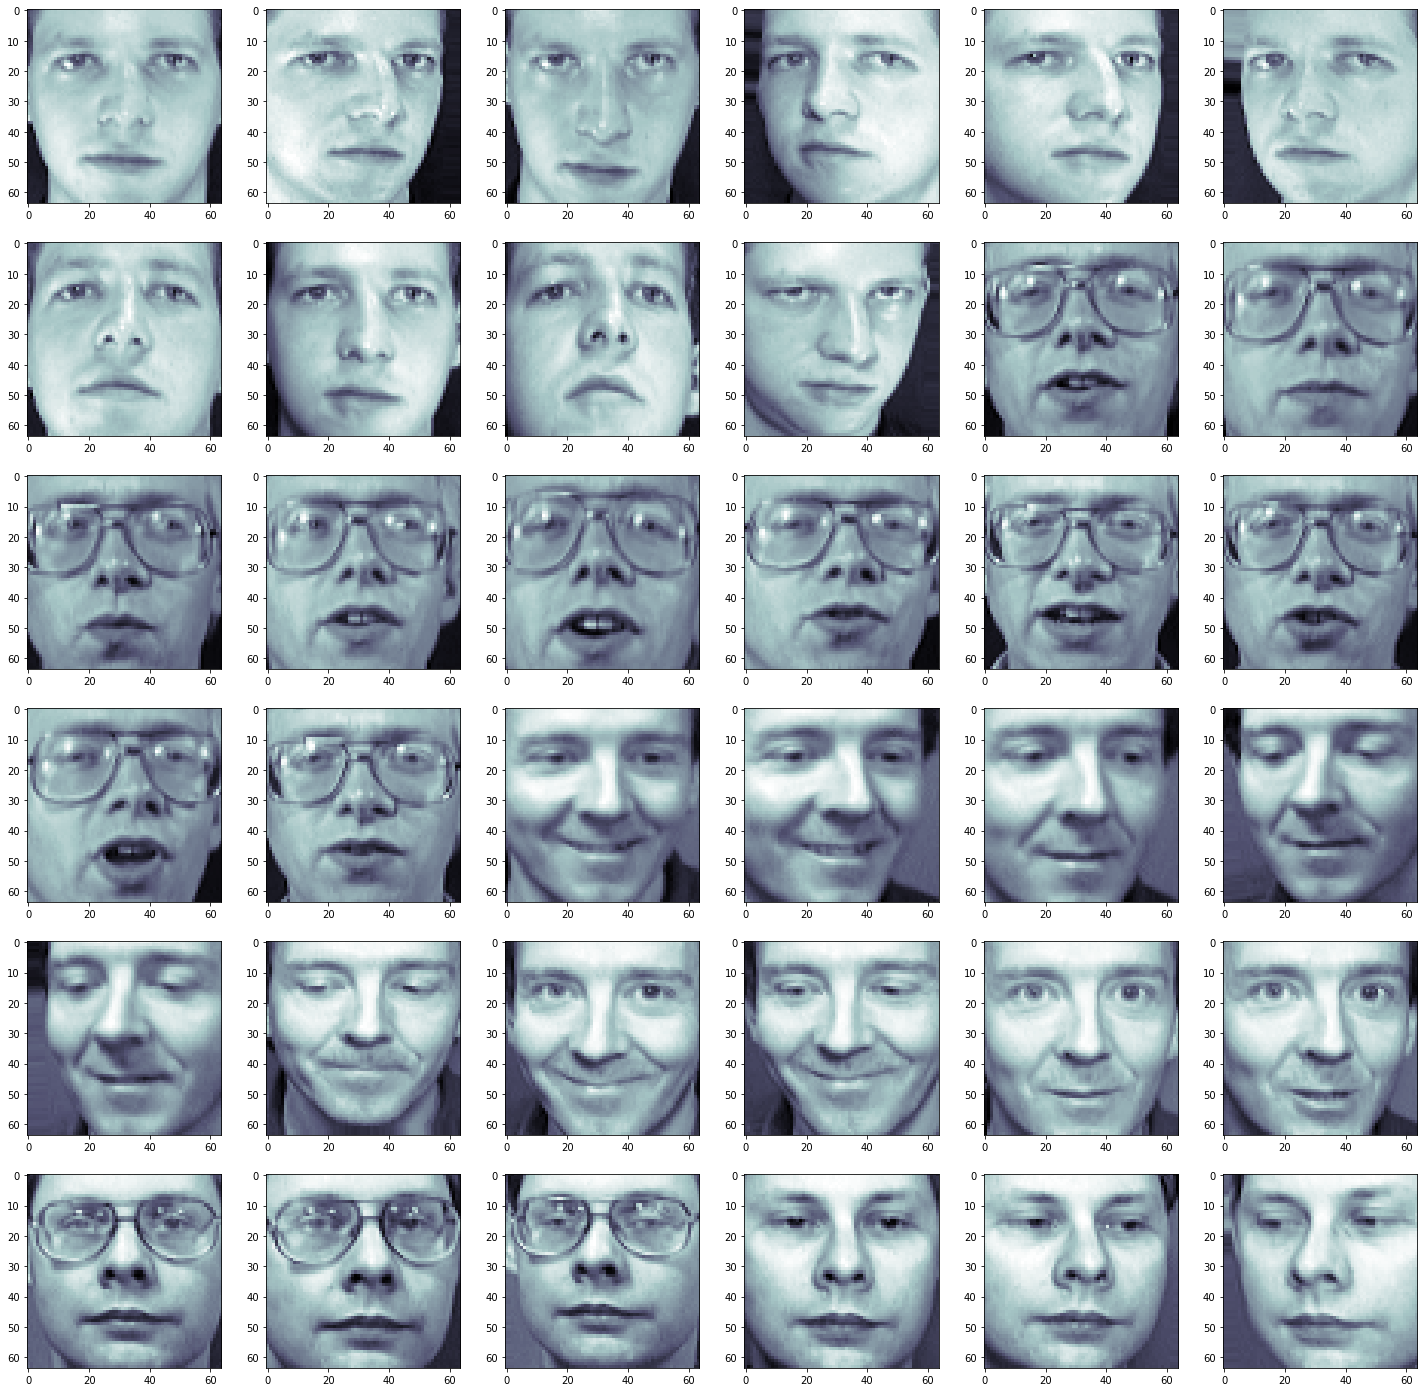

In [14]:
n = 6
fig, axs = plt.subplots(n, n, figsize=(25, 25))
for i in range(n):
    for j in range(n):
        axs[i][j].imshow(faces['images'][i * n + j], cmap=plt.cm.bone)

#### 5.	Разделите эти данные на тестовую и обучающую выборки;

In [15]:
# матрица пикселей
X = faces['data']
# oтношение данных к конкретному классу (всего 40 классов - 40 человек)
Y = faces['target']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=True)
#X, Y

#### 6.	Постройте модель классификатора метода опорных векторов для идентификации человека по изображению;

In [16]:
svc_model = SVC()
svc_model.fit(x_train, y_train)
y_svc_pred = svc_model.predict(x_test)

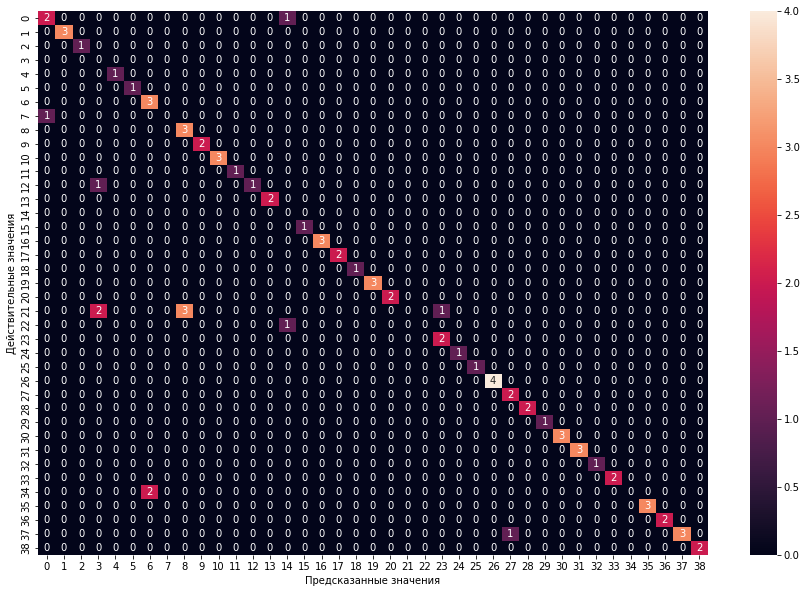

In [18]:
fig, ax = plt.subplots(figsize=(15, 10))

ticks = np.arange(len(y_test))


plt.xticks(ticks, y_test)
plt.yticks(ticks, y_test)

sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, y_svc_pred)), annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

#### 7.	Оцените качество модели на тестовой выборке с помощью следующих метрик:

a.	достоверность предсказания (accuracy);

b.	точность (precision);

c.	полнота (recall);

In [19]:
print('Метрика достоверности предсказания ->> ', metrics.accuracy_score(y_test, y_svc_pred))
print('Метрика точности ->> ', metrics.precision_score(y_test, y_svc_pred, average='weighted'))
print('Метрика полноты ->> ', metrics.recall_score(y_test, y_svc_pred, average='macro'))
# average - ?

Метрика достоверности предсказания ->>  0.8375
Метрика точности ->>  0.8120833333333334
Метрика полноты ->>  0.8183760683760684


In [20]:
print(metrics.classification_report(y_test, y_svc_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.60      1.00      0.75         3
           7       0.00      0.00      0.00         1
           8       0.50      1.00      0.67         3
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         2
          15       0.00      0.00      0.00         0
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         3
          18       1.00    

#### 8.	Постройте кривую обучения - график зависимости тестовой и обучающей эффективности от размера обучающей выборки.

In [21]:
# из файла кривые валидации и обучения
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1),data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
    facecolor=lines[0].get_color(), alpha=0.2)

In [22]:
def print_learning_curve(model, x_train, y_train, train_sizes=np.linspace(0.1, 1, 30)):
    _, train_scores, test_scores = learning_curve(model, x_train, y_train, train_sizes=train_sizes, cv=3)
    plt.title(model)
    plt.xlabel('train size')
    plt.ylabel('score')
    #plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training scores')
    #plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation scores')
    plot_with_err(train_sizes, train_scores, label='Training scores')
    plot_with_err(train_sizes, test_scores, label='Validation scores', color='g')
    plt.legend()
    plt.show()

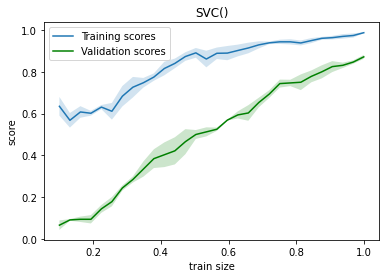

None


In [23]:
print(print_learning_curve(svc_model, x_train, y_train))

In [24]:
def analyze_model(model, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test):
    
    start = time.time()
    model.fit(x_train, y_train)
    end = time.time()
    print('Время обучения ->> ', round(end - start, 2))
    
    y_pred = model.predict(x_test)
    
    fig, ax = plt.subplots(figsize=(15, 10))
    print("Матрица ошибок")
    ticks = np.arange(len(y_test))
    #Добавлем ось x
    plt.xticks(ticks, y_test)
    #Добавляем ось y
    plt.yticks(ticks, y_test)
    #Строим матрицу при помощи sns
    sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)), annot=True)
    plt.ylabel('Действительные значения')
    plt.xlabel('Предсказанные значения')
    plt.show()
    
    print('Метрика достоверности предсказания ->> ', metrics.accuracy_score(y_test, y_pred))
    print('Метрика точности ->> ', metrics.precision_score(y_test, y_pred, average='weighted'))
    print('Метрика полноты ->> ', metrics.recall_score(y_test, y_pred, average='macro'))
    
    print(print_learning_curve(model, x_train, y_train))

логистическая регрессия (LogisticRegression)

Время обучения ->>  4.39
Матрица ошибок


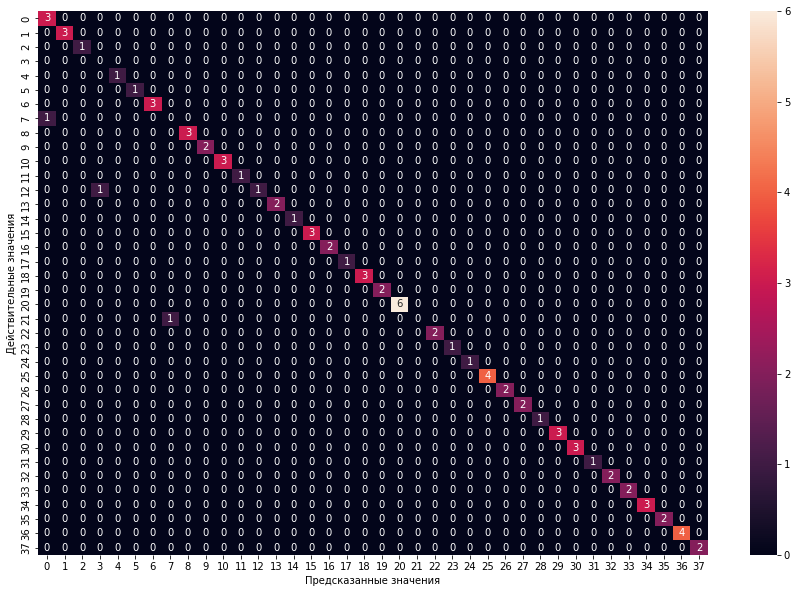

Метрика достоверности предсказания ->>  0.9625
Метрика точности ->>  0.965625
Метрика полноты ->>  0.9078947368421053


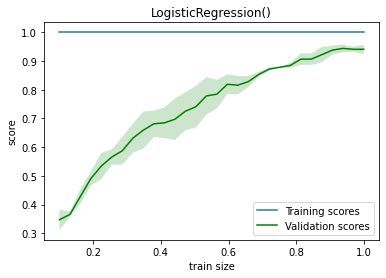

None


In [20]:
log_model = LogisticRegression()
analyze_model(log_model)

метод опорных векторов с полиномиальным ядром (SVC)

Время обучения ->>  0.18
Матрица ошибок


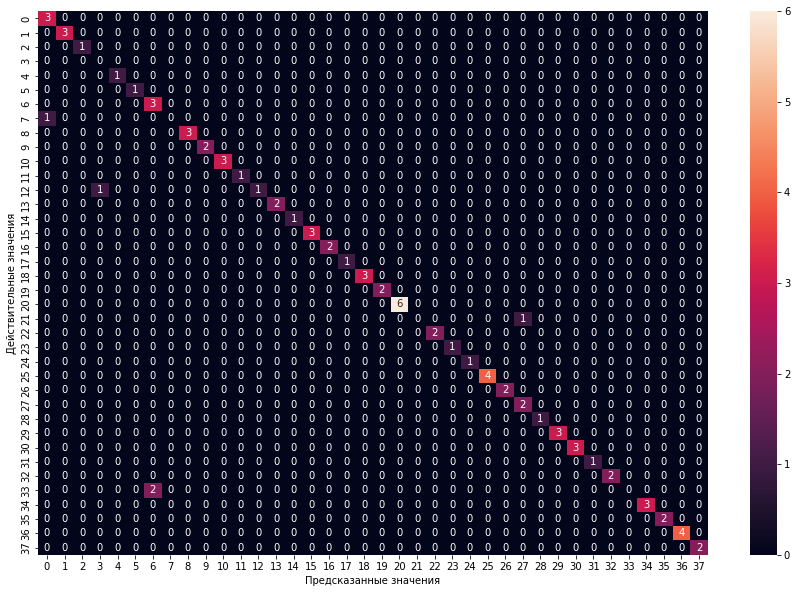

Метрика достоверности предсказания ->>  0.9375
Метрика точности ->>  0.9172916666666666
Метрика полноты ->>  0.881578947368421


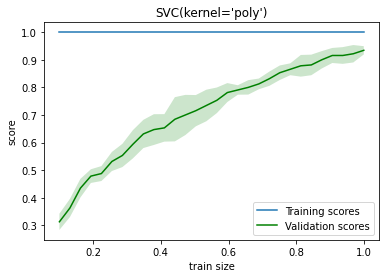

None


In [25]:
poly_svc_model = SVC(kernel='poly')
analyze_model(poly_svc_model)

метод k ближайших соседей (KNeighborsClassifier)

Время обучения ->>  0.0
Матрица ошибок


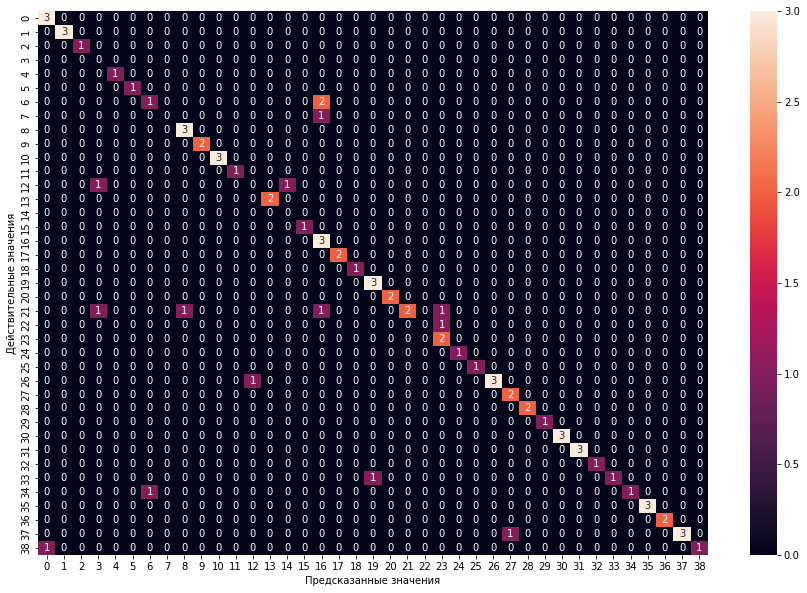

Метрика достоверности предсказания ->>  0.8125
Метрика точности ->>  0.8608630952380952
Метрика полноты ->>  0.7863247863247863


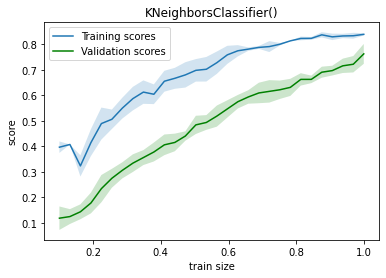

None


In [26]:
neigh_model = KNeighborsClassifier()
analyze_model(neigh_model)

многослойный перцептрон (MLP)

Время обучения ->>  2.17
Матрица ошибок


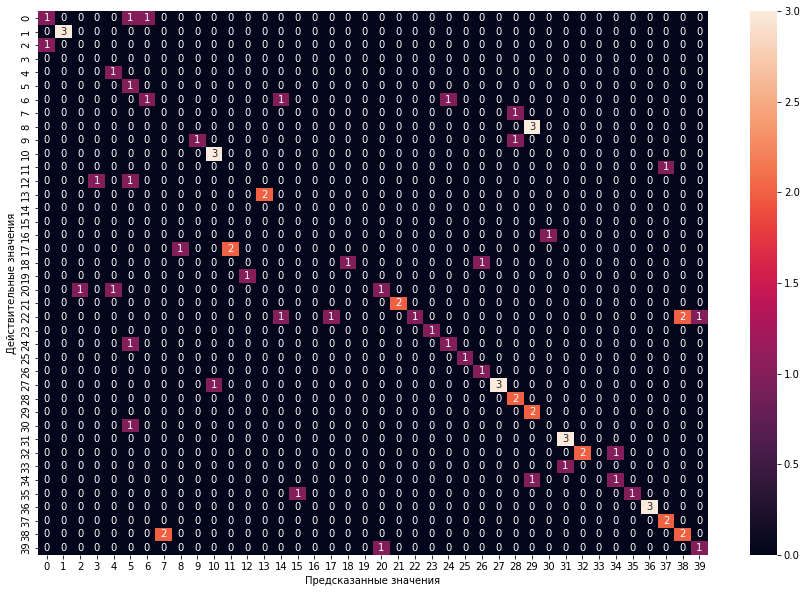

Метрика достоверности предсказания ->>  0.55
Метрика точности ->>  0.615
Метрика полноты ->>  0.5020833333333333


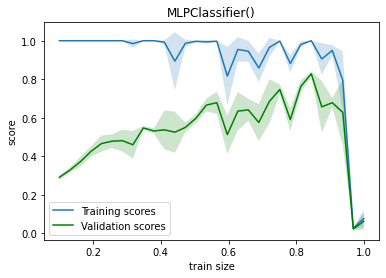

None


In [27]:
# долго
mlp_model = MLPClassifier()
analyze_model(mlp_model)